In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## IDEA 
Since this is a monthly revenue of a restaurant, we will take a POV as someone who is in FNB business who would like to share recommendations for restaurant to improve their revenue.

## A simple objective
To share recommendations to imporve monthly revenue, net profit, and ROI of the restaurant.

## Questions
1. What are the things that really affect a fnb business?
2. What kind of strategy to imporve the business?

**STEPS**
1. Data Understanding --> Describe data, what kind of each features tells us.
2. Data cleaning --> Check for null value --> None, continue.
3. EDA --> Check the relationship of each, with EDA. Give a lot of insights!! As this is a RANDOM restaurant, we would like to do some t-testing, before giving the conclusion that some of the features does affect the monthly revenue.
4. As monthly revenue only shares the revenue, we could do some feature engineering on 
* ---> NET PROFIT
* ---> ROI --> check more about this one (why it is important?)


5. Standarize --> Clustering --> Recommendation


In [2]:
data = pd.read_csv("Restaurant_revenue (1).csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        1000 non-null   int64  
 1   Menu_Price                 1000 non-null   float64
 2   Marketing_Spend            1000 non-null   float64
 3   Cuisine_Type               1000 non-null   object 
 4   Average_Customer_Spending  1000 non-null   float64
 5   Promotions                 1000 non-null   int64  
 6   Reviews                    1000 non-null   int64  
 7   Monthly_Revenue            1000 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 62.6+ KB


In [4]:
data.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

In [5]:
data.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.271000,30.219120,9.958726,29.477085,0.497000,49.837000,268.724172
std,26.364914,11.278760,5.845586,11.471686,0.500241,29.226334,103.982950
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,-28.977809
25%,30.000000,20.396828,4.690724,19.603041,0.000000,24.000000,197.103642
50%,54.000000,30.860614,10.092047,29.251365,0.000000,50.000000,270.213964
75%,74.000000,39.843868,14.992436,39.553220,1.000000,76.000000,343.395793
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


In [6]:
data = data[data['Monthly_Revenue'] >= 0]

In [7]:
data.isnull().sum()

Number_of_Customers          0
Menu_Price                   0
Marketing_Spend              0
Cuisine_Type                 0
Average_Customer_Spending    0
Promotions                   0
Reviews                      0
Monthly_Revenue              0
dtype: int64

In [8]:
data.describe()

,Number_of_Customers,Menu_Price,Marketing_Spend,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue
count,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000,995.000000
mean,53.477387,30.234683,9.993658,29.480918,0.494472,49.875377,270.193731
std,26.268660,11.286305,5.837396,11.473448,0.500221,29.232925,102.147706
min,10.000000,10.009501,0.003768,10.037177,0.000000,0.000000,3.819308
25%,31.000000,20.384320,4.708948,19.641153,0.000000,24.000000,199.433670
50%,54.000000,30.852027,10.171586,29.211770,0.000000,50.000000,270.542551
75%,74.500000,39.894946,15.005803,39.556699,1.000000,76.000000,343.509944
max,99.000000,49.974140,19.994276,49.900725,1.000000,99.000000,563.381332


**Understanding the data**

This dataset has 1000 columns, in one column representing a restaurant with 8 features. 
The features:
1. Number_of_Customers: Total number of customer in each restaurant/month
2. Menu_Price: Total price of the menu sold in each restaurant
3. Marketing_Spend: Total marketing spended for each restaurant for that month
4. Average_Customer_Spending: Total average customer spending for that month
5. Promotions: 0, Indicating the restaurant didnt have any promotions and 1, Indicating the restaurant give a promotion for that month
6. Reviews: The total review that restaurant get 
7. Monthly revenue: The revenue that each restaurant get

## EDA


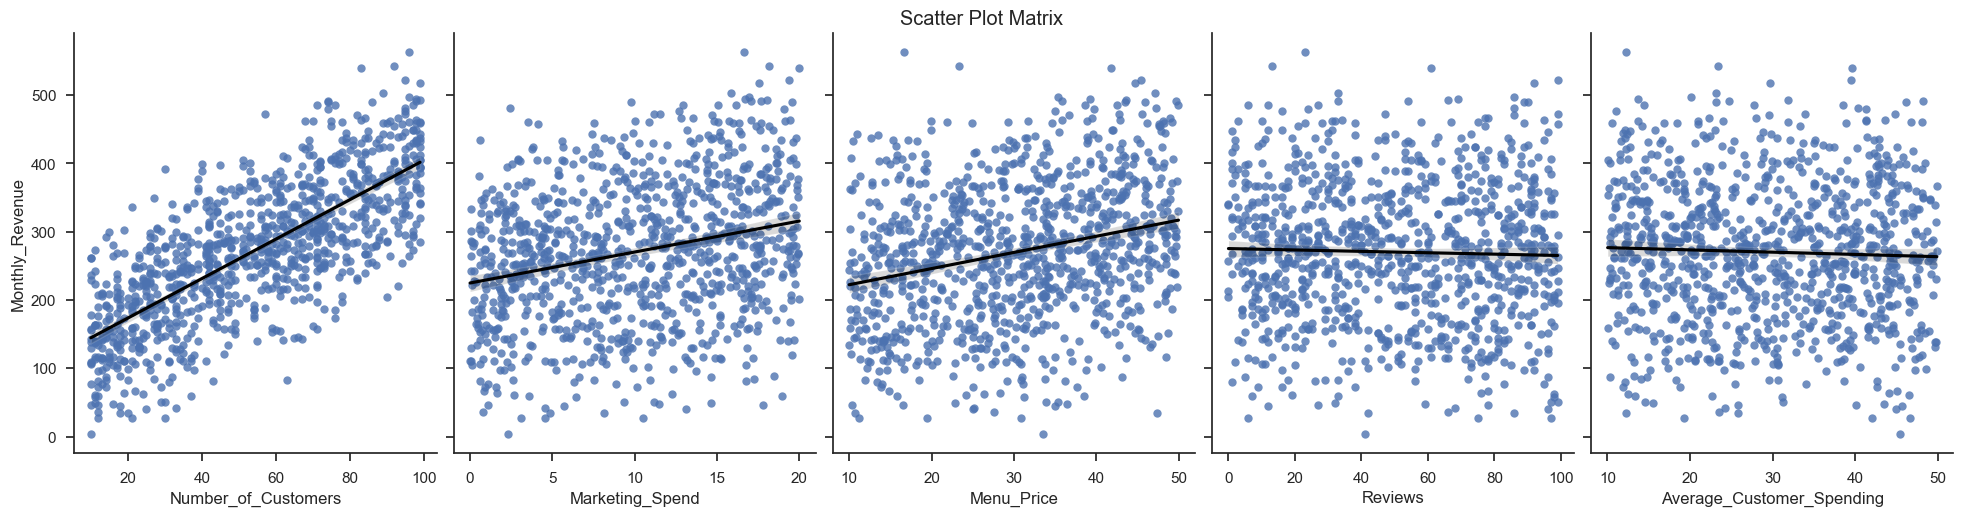

In [84]:

sns.set(style="ticks")


g = sns.pairplot(data, 
                 x_vars=["Number_of_Customers", "Marketing_Spend", "Menu_Price", "Reviews", "Average_Customer_Spending"], 
                 y_vars=["Monthly_Revenue"], 
                 height=5, aspect=0.8, 
                 kind="reg", 
                 plot_kws={'line_kws':{'color':'black'}})

# Display the plot
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

/var/folders/2v/fpz2kl0x1pj_wvh7jqk26gg40000gn/T/ipykernel_79262/728979424.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/2v/fpz2kl0x1pj_wvh7jqk26gg40000gn/T/ipykernel_79262/728979424.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/2v/fpz2kl0x1pj_wvh7jqk26gg40000gn/T/ipykernel_79262/728979424.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/2v/fpz2kl0x1pj_wvh7jqk26gg40000gn/T/ipykernel_79262/728979424.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

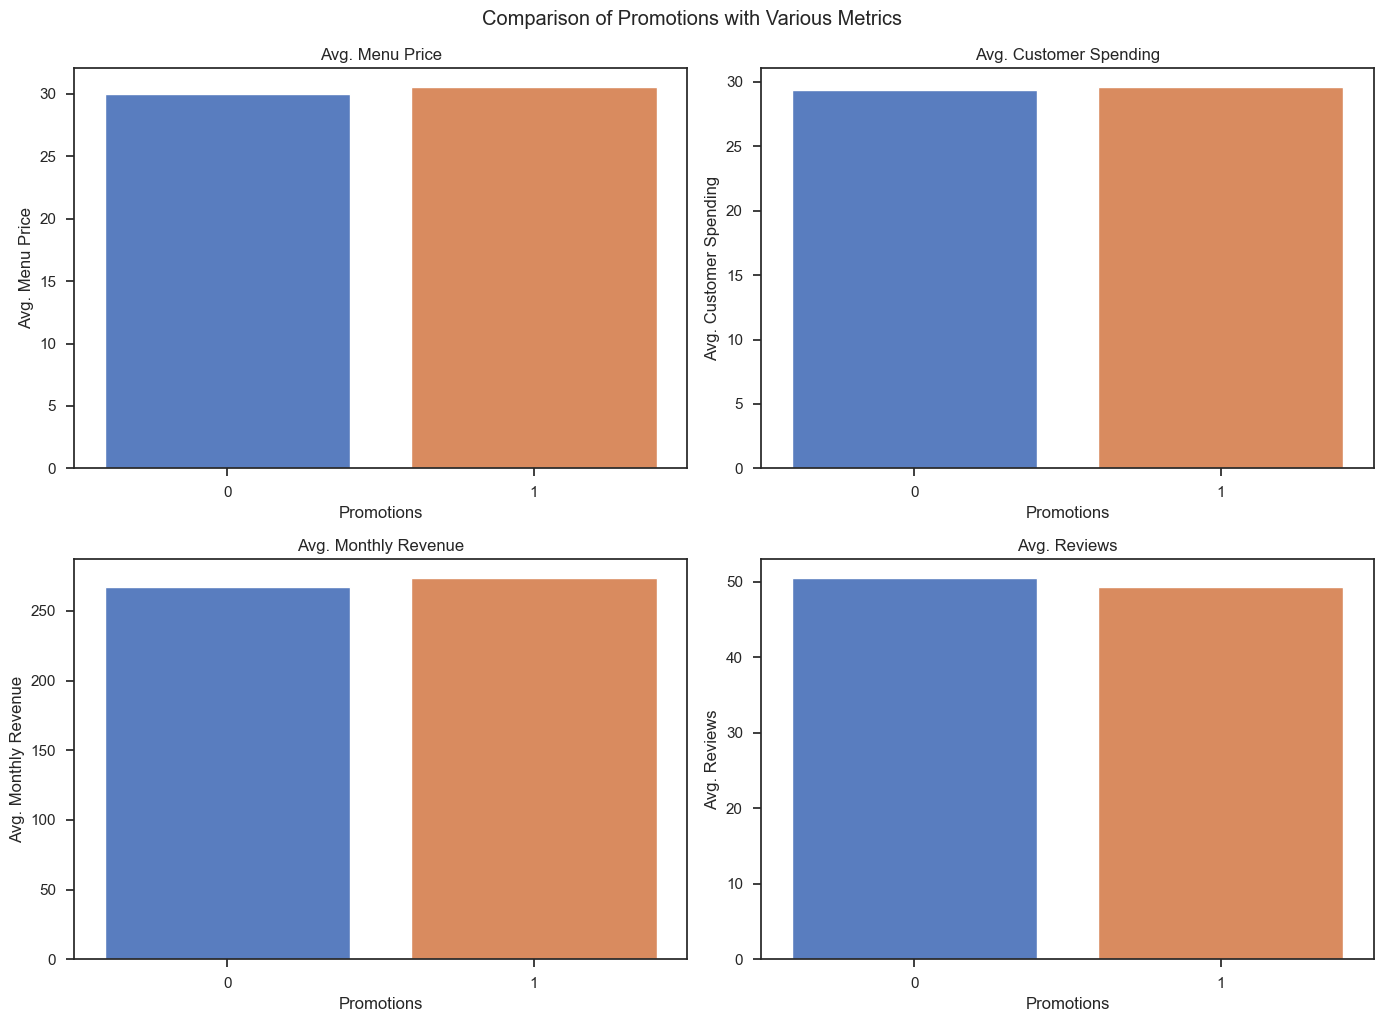

In [86]:

promotions_group = data.groupby('Promotions').mean()


fig, axes = plt.subplots(2, 2, figsize=(14, 10))


sns.barplot(x=promotions_group.index, y=promotions_group['Menu_Price'], ax=axes[0, 0], palette='muted')
axes[0, 0].set_title('Avg. Menu Price')
axes[0, 0].set_xlabel('Promotions')
axes[0, 0].set_ylabel('Avg. Menu Price')


sns.barplot(x=promotions_group.index, y=promotions_group['Average_Customer_Spending'], ax=axes[0, 1], palette='muted')
axes[0, 1].set_title('Avg. Customer Spending')
axes[0, 1].set_xlabel('Promotions')
axes[0, 1].set_ylabel('Avg. Customer Spending')


sns.barplot(x=promotions_group.index, y=promotions_group['Monthly_Revenue'], ax=axes[1, 0], palette='muted')
axes[1, 0].set_title('Avg. Monthly Revenue')
axes[1, 0].set_xlabel('Promotions')
axes[1, 0].set_ylabel('Avg. Monthly Revenue')


sns.barplot(x=promotions_group.index, y=promotions_group['Reviews'], ax=axes[1, 1], palette='muted')
axes[1, 1].set_title('Avg. Reviews')
axes[1, 1].set_xlabel('Promotions')
axes[1, 1].set_ylabel('Avg. Reviews')


plt.tight_layout()
plt.suptitle('Comparison of Promotions with Various Metrics', y=1.02)
plt.show()


/var/folders/2v/fpz2kl0x1pj_wvh7jqk26gg40000gn/T/ipykernel_79262/1982521394.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/2v/fpz2kl0x1pj_wvh7jqk26gg40000gn/T/ipykernel_79262/1982521394.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/2v/fpz2kl0x1pj_wvh7jqk26gg40000gn/T/ipykernel_79262/1982521394.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/2v/fpz2kl0x1pj_wvh7jqk26gg40000gn/T/ipykernel_79262/1982521394.py:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

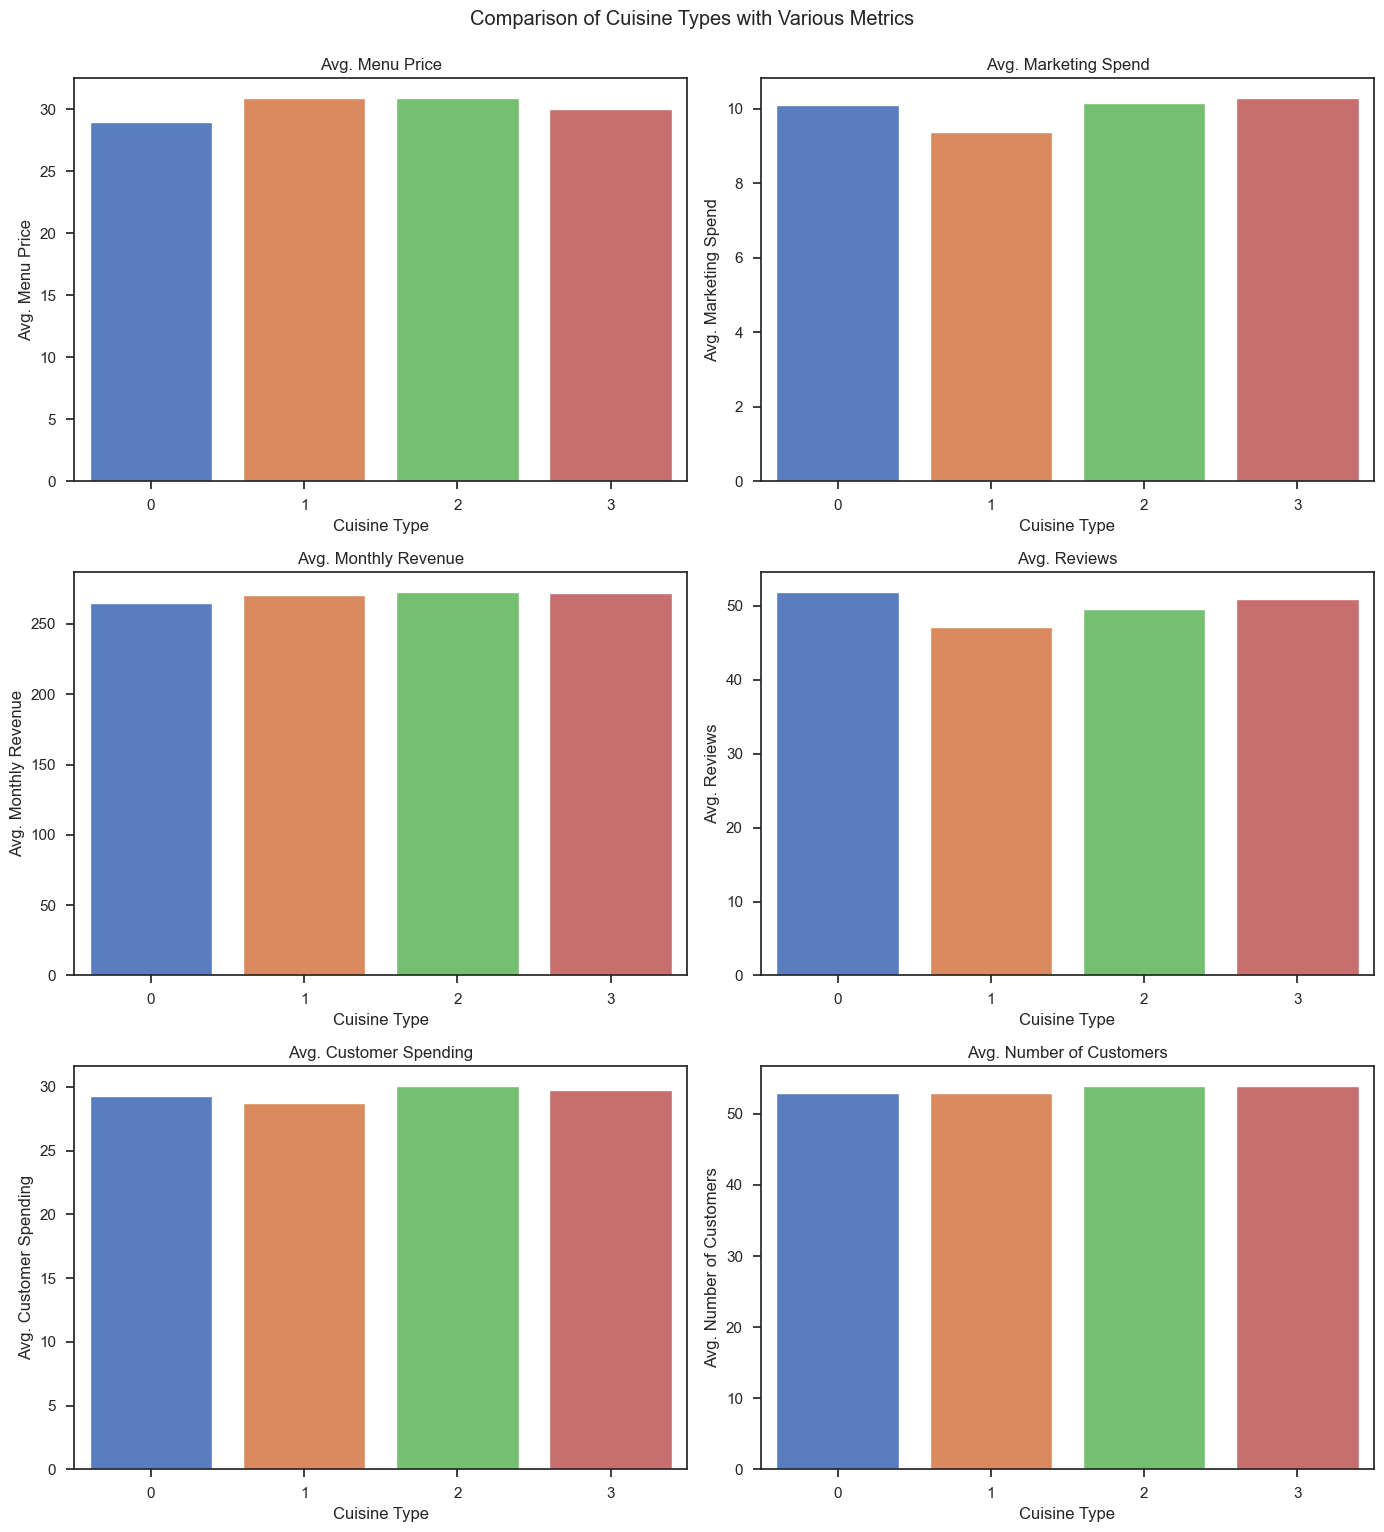

In [87]:
cuisine_group = data.groupby('Cuisine_Type').mean()


fig, axes = plt.subplots(3, 2, figsize=(14, 15))


sns.barplot(x=cuisine_group.index, y=cuisine_group['Menu_Price'], ax=axes[0, 0], palette='muted')
axes[0, 0].set_title('Avg. Menu Price')
axes[0, 0].set_xlabel('Cuisine Type')
axes[0, 0].set_ylabel('Avg. Menu Price')


sns.barplot(x=cuisine_group.index, y=cuisine_group['Marketing_Spend'], ax=axes[0, 1], palette='muted')
axes[0, 1].set_title('Avg. Marketing Spend')
axes[0, 1].set_xlabel('Cuisine Type')
axes[0, 1].set_ylabel('Avg. Marketing Spend')


sns.barplot(x=cuisine_group.index, y=cuisine_group['Monthly_Revenue'], ax=axes[1, 0], palette='muted')
axes[1, 0].set_title('Avg. Monthly Revenue')
axes[1, 0].set_xlabel('Cuisine Type')
axes[1, 0].set_ylabel('Avg. Monthly Revenue')


sns.barplot(x=cuisine_group.index, y=cuisine_group['Reviews'], ax=axes[1, 1], palette='muted')
axes[1, 1].set_title('Avg. Reviews')
axes[1, 1].set_xlabel('Cuisine Type')
axes[1, 1].set_ylabel('Avg. Reviews')


sns.barplot(x=cuisine_group.index, y=cuisine_group['Average_Customer_Spending'], ax=axes[2, 0], palette='muted')
axes[2, 0].set_title('Avg. Customer Spending')
axes[2, 0].set_xlabel('Cuisine Type')
axes[2, 0].set_ylabel('Avg. Customer Spending')


sns.barplot(x=cuisine_group.index, y=cuisine_group['Number_of_Customers'], ax=axes[2, 1], palette='muted')
axes[2, 1].set_title('Avg. Number of Customers')
axes[2, 1].set_xlabel('Cuisine Type')
axes[2, 1].set_ylabel('Avg. Number of Customers')


plt.tight_layout()
plt.suptitle('Comparison of Cuisine Types with Various Metrics', y=1.02)
plt.show()


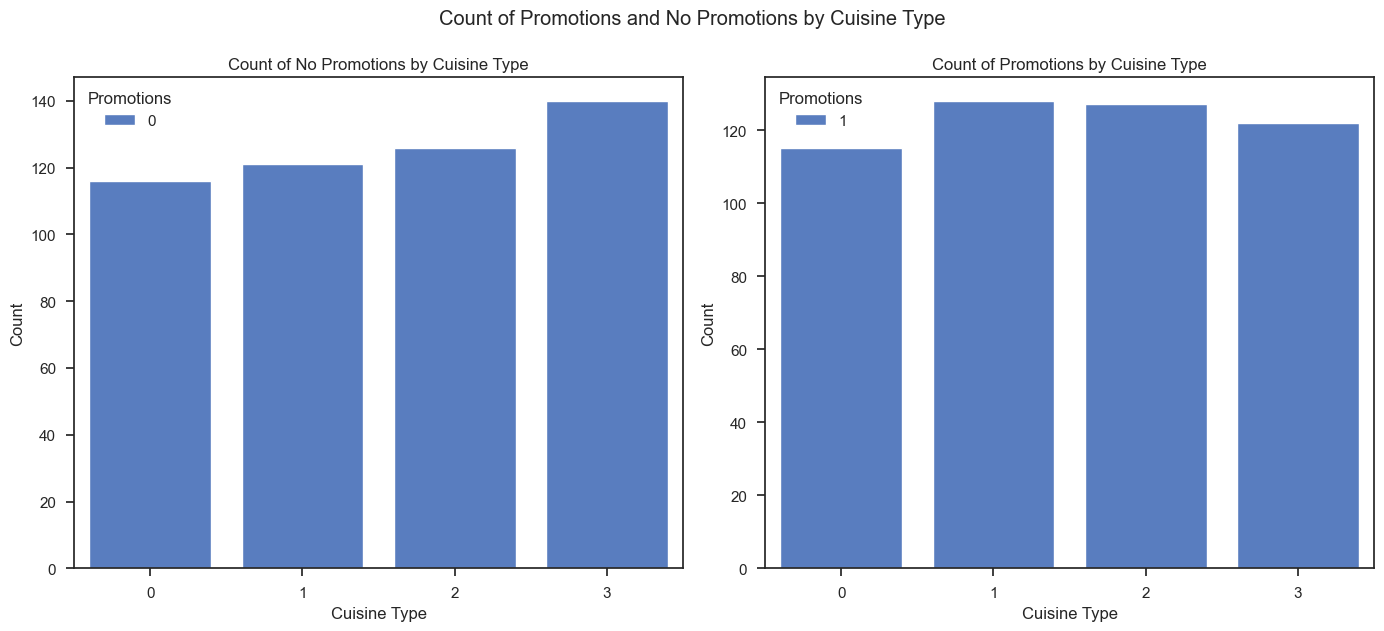

In [88]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))


sns.countplot(x='Cuisine_Type', hue='Promotions', data=data[data['Promotions'] == 0], palette='muted', ax=axes[0])
axes[0].set_title('Count of No Promotions by Cuisine Type')
axes[0].set_xlabel('Cuisine Type')
axes[0].set_ylabel('Count')


sns.countplot(x='Cuisine_Type', hue='Promotions', data=data[data['Promotions'] == 1], palette='muted', ax=axes[1])
axes[1].set_title('Count of Promotions by Cuisine Type')
axes[1].set_xlabel('Cuisine Type')
axes[1].set_ylabel('Count')


plt.tight_layout()
plt.suptitle('Count of Promotions and No Promotions by Cuisine Type', y=1.05)
plt.show()


In [9]:
data['Popularity'] = pd.qcut(data['Number_of_Customers'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [10]:
data.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Popularity
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040,High
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091,Low
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763,Very High
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573,High
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121,Low


/var/folders/2v/fpz2kl0x1pj_wvh7jqk26gg40000gn/T/ipykernel_79262/1718635479.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Popularity', data=data, palette='viridis')


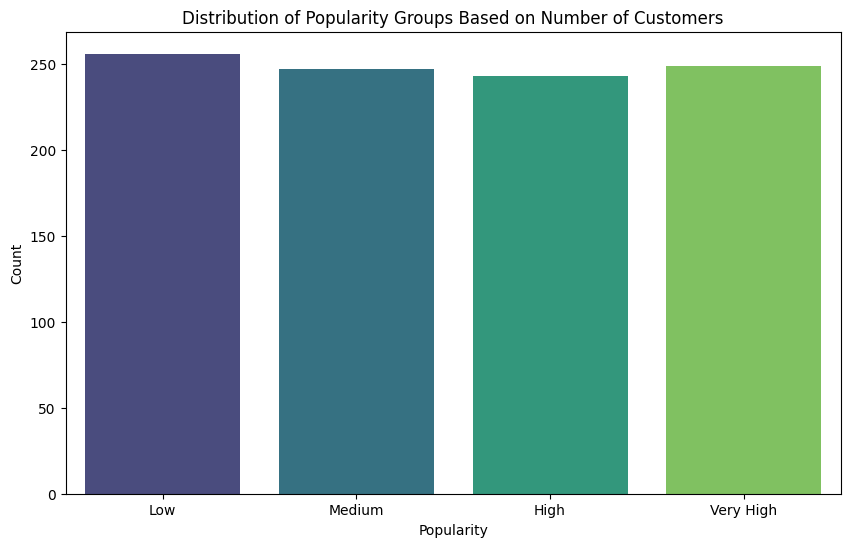

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Popularity', data=data, palette='viridis')
plt.title('Distribution of Popularity Groups Based on Number of Customers')
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.show()

/var/folders/2v/fpz2kl0x1pj_wvh7jqk26gg40000gn/T/ipykernel_79262/665008871.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_revenue_by_popularity = data.groupby('Popularity')['Monthly_Revenue'].mean()


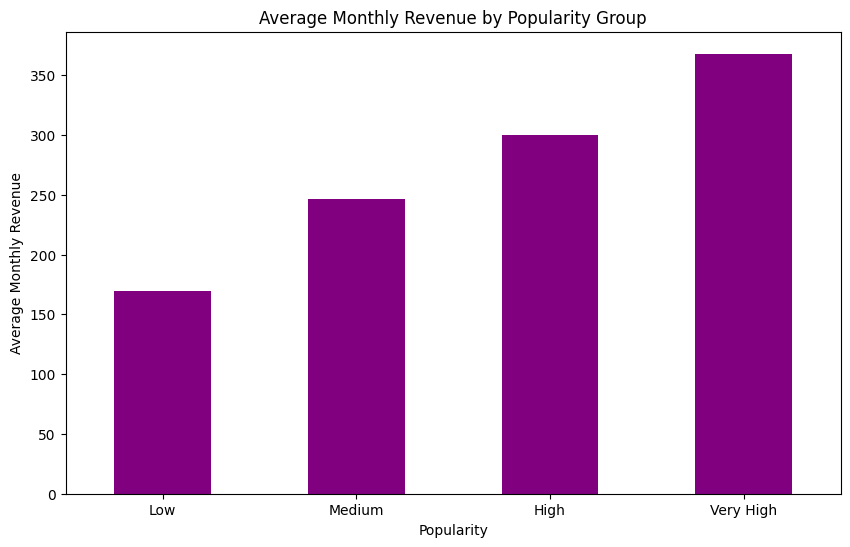

In [15]:
# Calculate the average monthly revenue for each popularity group
avg_revenue_by_popularity = data.groupby('Popularity')['Monthly_Revenue'].mean()

# Plot the average monthly revenue for each popularity group
plt.figure(figsize=(10, 6))
avg_revenue_by_popularity.plot(kind='bar', color='purple')
plt.title('Average Monthly Revenue by Popularity Group')
plt.xlabel('Popularity')
plt.ylabel('Average Monthly Revenue')
plt.xticks(rotation=0)
plt.show()


In [16]:
encoding = {'Low': 0, 'Medium': 1, 'High': 2, 'Very High':3}
data['Popularity'] = data['Popularity'].map(encoding)

In [17]:
data.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Popularity
0,61,43.117635,12.663793,Japanese,36.236133,0,45,350.912040,2
1,24,40.020077,4.577892,Italian,17.952562,0,36,221.319091,0
2,81,41.981485,4.652911,Japanese,22.600420,1,91,326.529763,3
3,70,43.005307,4.416053,Italian,18.984098,1,59,348.190573,2
4,30,17.456199,3.475052,Italian,12.766143,1,30,185.009121,0


In [18]:
data.groupby(['Cuisine_Type']).size().reset_index(name='Count')

,Cuisine_Type,Count
0,American,253
1,Italian,231
2,Japanese,262
3,Mexican,249


In [19]:
encoding = {'Italian': 0, 'Mexican': 1, 'American': 2, 'Japanese':3}
data['Cuisine_Type'] = data['Cuisine_Type'].map(encoding)

In [20]:
data.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Popularity
0,61,43.117635,12.663793,3,36.236133,0,45,350.912040,2
1,24,40.020077,4.577892,0,17.952562,0,36,221.319091,0
2,81,41.981485,4.652911,3,22.600420,1,91,326.529763,3
3,70,43.005307,4.416053,0,18.984098,1,59,348.190573,2
4,30,17.456199,3.475052,0,12.766143,1,30,185.009121,0


In [21]:

data['Net_Profit'] = data['Monthly_Revenue'] - data['Marketing_Spend']


data['ROI'] = (data['Net_Profit'] / data['Marketing_Spend']) * 100

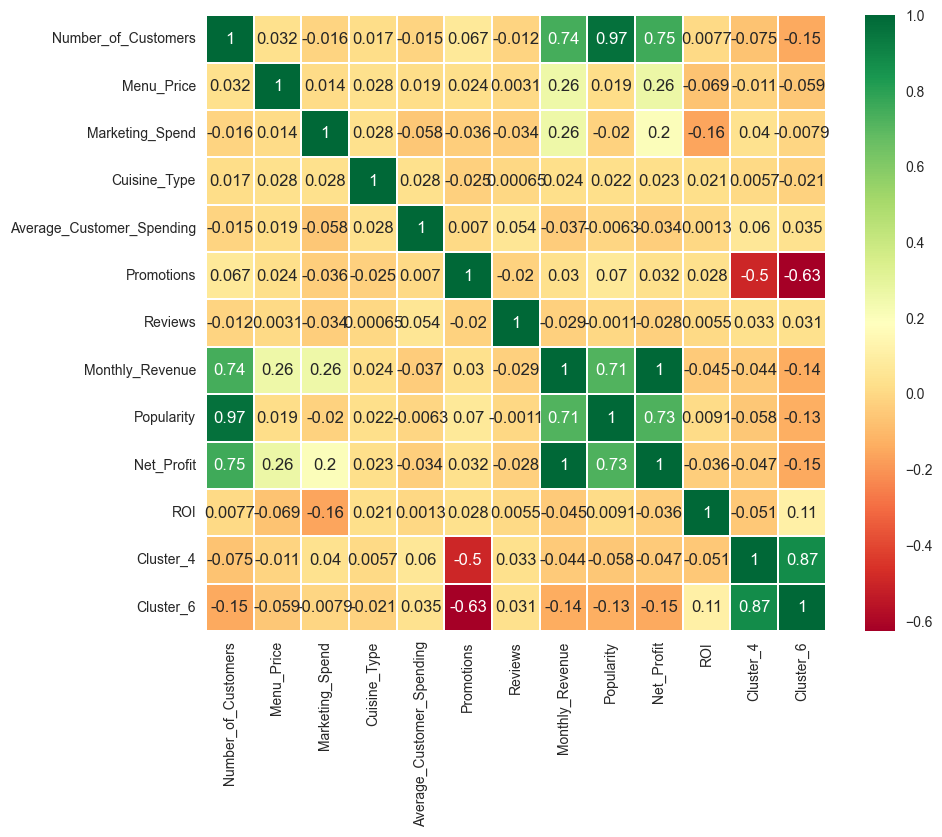

In [83]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

In [22]:
data.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Popularity,Net_Profit,ROI
0,61,43.117635,12.663793,3,36.236133,0,45,350.912040,2,338.248247,2670.986965
1,24,40.020077,4.577892,0,17.952562,0,36,221.319091,0,216.741199,4734.519614
2,81,41.981485,4.652911,3,22.600420,1,91,326.529763,3,321.876852,6917.752519
3,70,43.005307,4.416053,0,18.984098,1,59,348.190573,2,343.774521,7784.656389
4,30,17.456199,3.475052,0,12.766143,1,30,185.009121,0,181.534069,5223.923936


In [23]:
features = data[['Number_of_Customers', 'Menu_Price', 'Marketing_Spend',
                 'Monthly_Revenue', 'Popularity', 'Cuisine_Type','Promotions','Net_Profit', 'ROI','Average_Customer_Spending']]




In [85]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

features_log_transformed = features.copy()
features_log_transformed['Marketing_Spend'] = np.log1p(features['Marketing_Spend'])
features_log_transformed['Monthly_Revenue'] = np.log1p(features['Monthly_Revenue'])


poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(features_log_transformed)


scaler = StandardScaler()
scaled_features = scaler.fit_transform(poly_features)


pca = PCA(n_components=3)  
pca_features = pca.fit_transform(scaled_features)


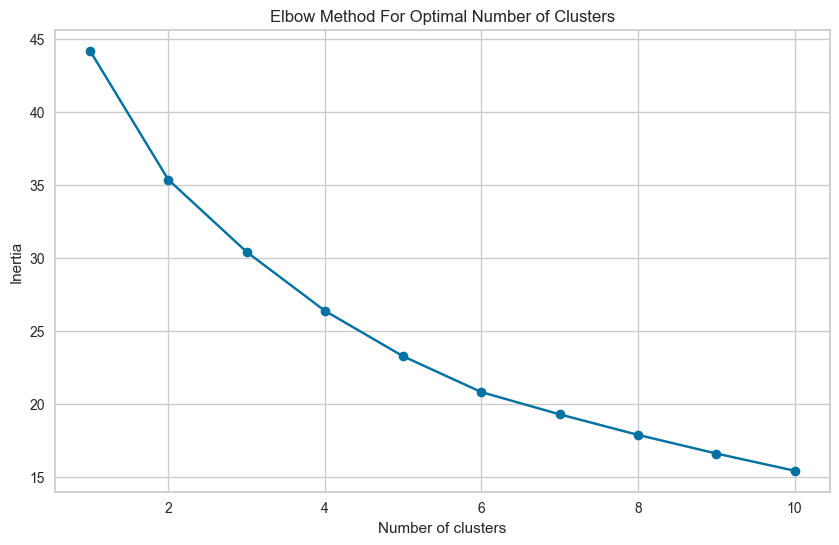

In [79]:
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

Silhouette score for 2 clusters: 0.3900
Silhouette score for 3 clusters: 0.4085
Silhouette score for 4 clusters: 0.4181
Silhouette score for 5 clusters: 0.4160
Silhouette score for 6 clusters: 0.4194
Silhouette score for 7 clusters: 0.3985
Silhouette score for 8 clusters: 0.4146
Silhouette score for 9 clusters: 0.4014
Silhouette score for 10 clusters: 0.3853


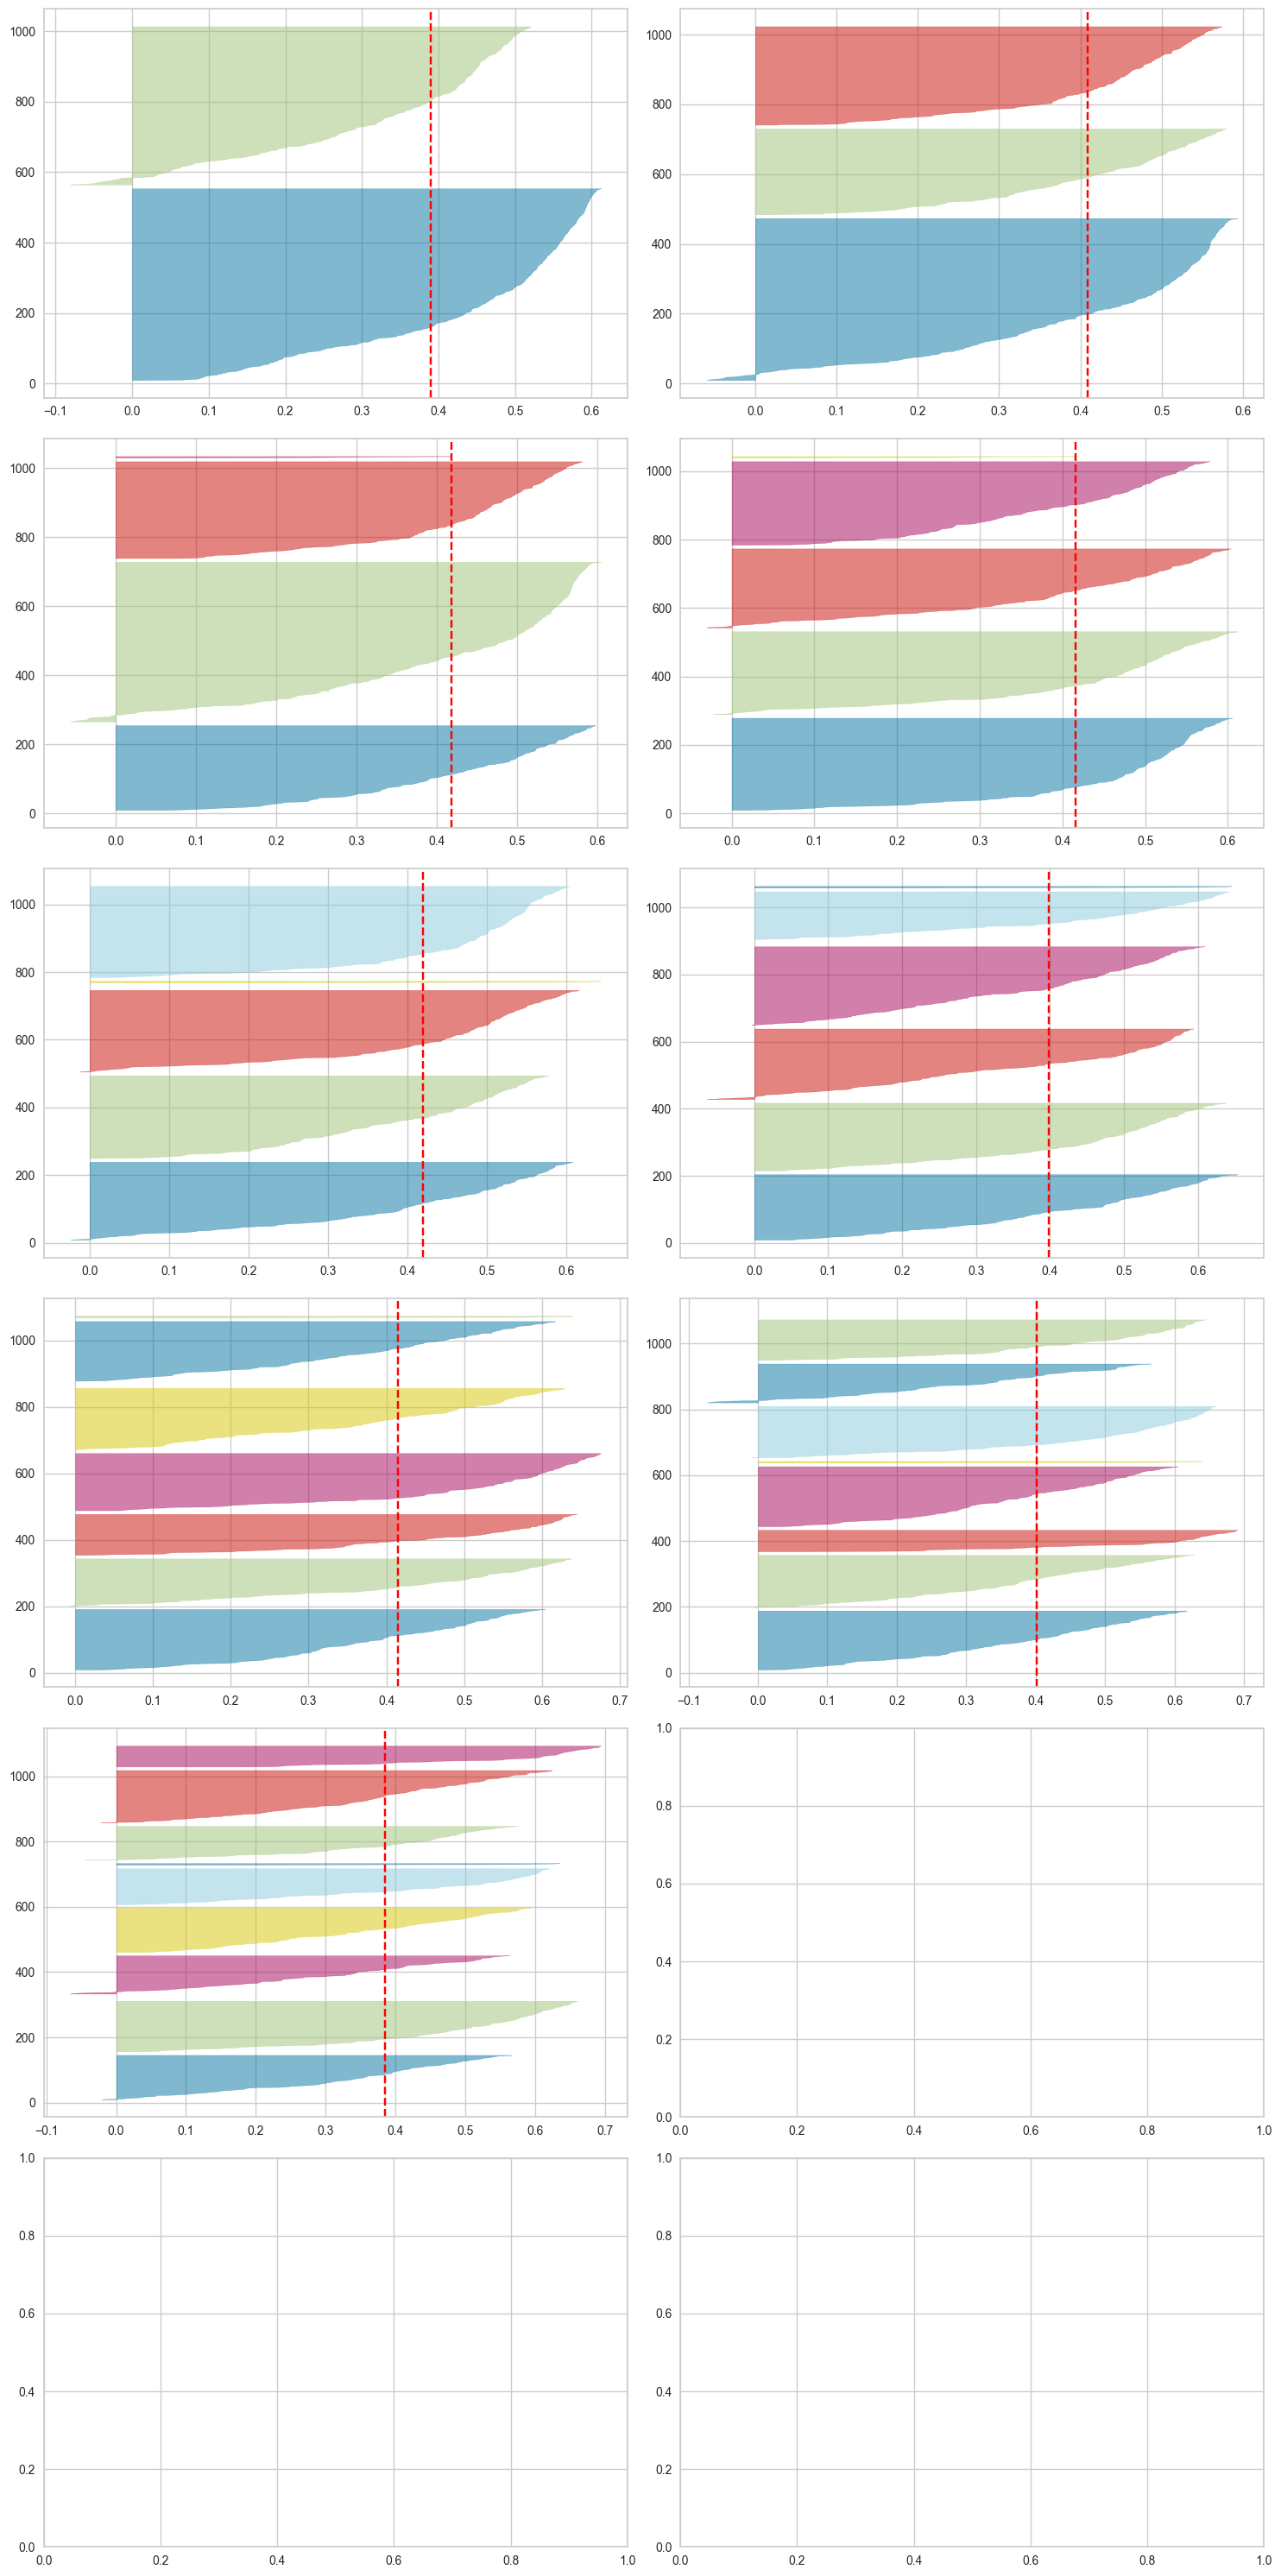

In [81]:

fig, ax = plt.subplots(6, 2, figsize=(15, 30)) 
silhouette_scores = []

for i in range(2, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=20, max_iter=300, random_state=42)
    q, mod = divmod(i-2, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q, mod])
    visualizer.fit(pca_features)
    silhouette_avg = silhouette_score(pca_features, km.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f'Silhouette score for {i} clusters: {silhouette_avg:.4f}')

plt.tight_layout()
plt.show()

Silhouette score for 4 clusters: 0.4181
Silhouette score for 6 clusters: 0.4194


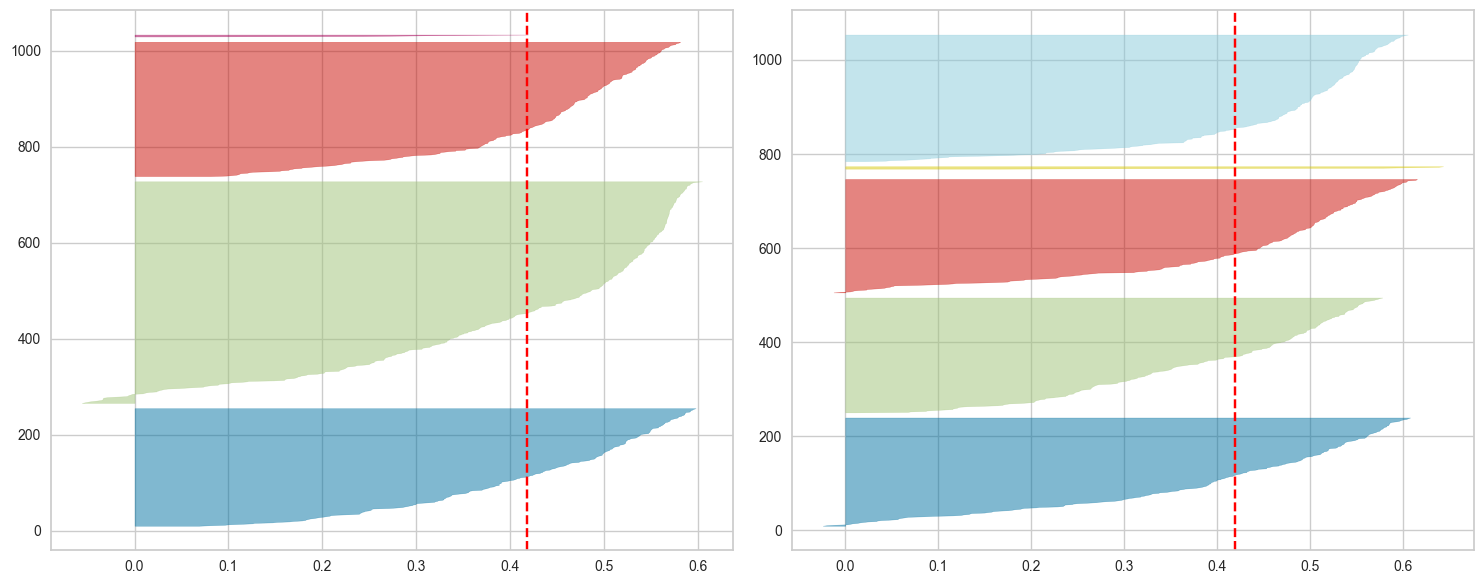

In [34]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
import plotly.graph_objects as go


features_log_transformed = features.copy()
features_log_transformed['Marketing_Spend'] = np.log1p(features['Marketing_Spend'])
features_log_transformed['Monthly_Revenue'] = np.log1p(features['Monthly_Revenue'])


poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(features_log_transformed)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(poly_features)


pca = PCA(n_components=3)  
pca_features = pca.fit_transform(scaled_features)


fig, ax = plt.subplots(1, 2, figsize=(15, 6))

k_values = [4, 6]
for idx, k in enumerate(k_values):
    km = KMeans(n_clusters=k, init='k-means++', n_init=20, max_iter=300, random_state=42)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[idx])
    visualizer.fit(pca_features)
    silhouette_avg = silhouette_score(pca_features, km.labels_)
    print(f'Silhouette score for {k} clusters: {silhouette_avg:.4f}')

plt.tight_layout()
plt.show()




kmeans_4 = KMeans(n_clusters=4, random_state=42)
labels_4 = kmeans_4.fit_predict(pca_features)

trace4 = go.Scatter3d(x=pca_features[:, 0], y=pca_features[:, 1], z=pca_features[:, 2],
                      mode='markers', marker=dict(color=labels_4, size=10, line=dict(color='black', width=10)))
layout4 = go.Layout(title='3D Scatter Plot for k=4', scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'))
fig4 = go.Figure(data=[trace4], layout=layout4)

kmeans_6 = KMeans(n_clusters=6, random_state=42)
labels_6= kmeans_6.fit_predict(pca_features)

trace6 = go.Scatter3d(x=pca_features[:, 0], y=pca_features[:, 1], z=pca_features[:, 2],
                      mode='markers', marker=dict(color=labels_6, size=10, line=dict(color='black', width=10)))
layout6 = go.Layout(title='3D Scatter Plot for k=5', scene=dict(xaxis_title='PC1', yaxis_title='PC2', zaxis_title='PC3'))
fig5 = go.Figure(data=[trace6], layout=layout6)

fig4.show()
fig5.show()


In [35]:
# Apply KMeans clustering
kmeans_4 = KMeans(n_clusters=4, random_state=42)
data['Cluster_4'] = kmeans_4.fit_predict(pca_features)

kmeans_6 = KMeans(n_clusters=6, random_state=42)
data['Cluster_6'] = kmeans_6.fit_predict(pca_features)


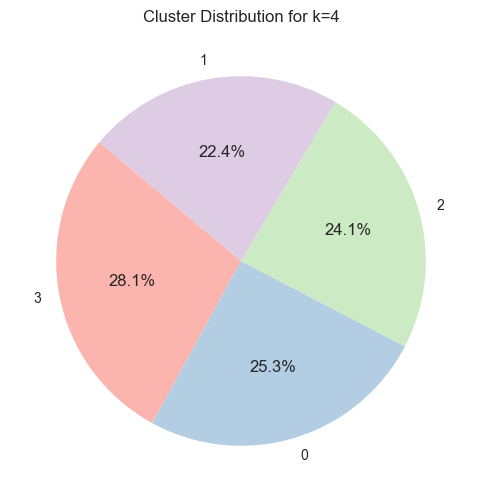

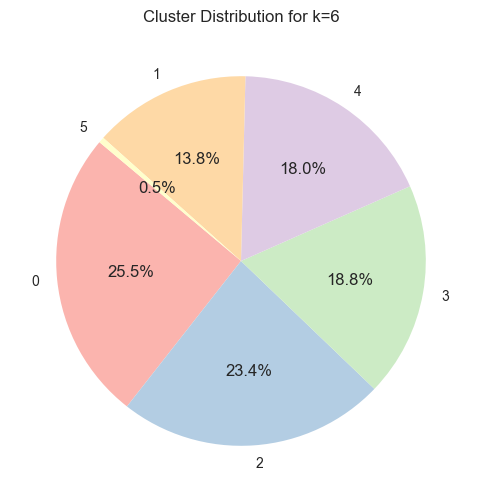

In [82]:
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the clustering information

# Pie chart for k=4
cluster_counts_4 = data['Cluster_4'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts_4, labels=cluster_counts_4.index, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('Pastel1').colors)
plt.title('Cluster Distribution for k=4')
plt.show()

# Pie chart for k=6
cluster_counts_6 = data['Cluster_6'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(cluster_counts_6, labels=cluster_counts_6.index, autopct='%1.1f%%', startangle=140, colors=plt.get_cmap('Pastel1').colors)
plt.title('Cluster Distribution for k=6')
plt.show()



In [64]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Popularity'] = label_encoder.fit_transform(data['Popularity']) 

In [65]:
data.head()

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Popularity,Net_Profit,ROI,Cluster_4,Cluster_6
0,61,43.117635,12.663793,3,36.236133,0,45,350.912040,2,338.248247,2670.986965,1,1
1,24,40.020077,4.577892,0,17.952562,0,36,221.319091,0,216.741199,4734.519614,3,4
2,81,41.981485,4.652911,3,22.600420,1,91,326.529763,3,321.876852,6917.752519,2,2
3,70,43.005307,4.416053,0,18.984098,1,59,348.190573,2,343.774521,7784.656389,2,2
4,30,17.456199,3.475052,0,12.766143,1,30,185.009121,0,181.534069,5223.923936,0,0


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Number_of_Customers        995 non-null    int64  
 1   Menu_Price                 995 non-null    float64
 2   Marketing_Spend            995 non-null    float64
 3   Cuisine_Type               995 non-null    int64  
 4   Average_Customer_Spending  995 non-null    float64
 5   Promotions                 995 non-null    int64  
 6   Reviews                    995 non-null    int64  
 7   Monthly_Revenue            995 non-null    float64
 8   Popularity                 995 non-null    int64  
 9   Net_Profit                 995 non-null    float64
 10  ROI                        995 non-null    float64
 11  Cluster_4                  995 non-null    int32  
 12  Cluster_6                  995 non-null    int32  
dtypes: float64(6), int32(2), int64(5)
memory usage: 101.1 K

In [68]:
kmeans_4 = KMeans(n_clusters=4, random_state=42).fit(scaled_features)
kmeans_6 = KMeans(n_clusters=6, random_state=42).fit(scaled_features)


data['Cluster_4'] = kmeans_4.labels_
data['Cluster_6'] = kmeans_6.labels_


cluster_4_analysis = data.groupby('Cluster_4').mean()
cluster_6_analysis = data.groupby('Cluster_6').mean()

cluster_4_analysis

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Popularity,Net_Profit,ROI,Cluster_6
Cluster_4,,,,,,,,,,,,
0,35.146825,28.964733,9.355013,1.424603,28.265754,1.0,48.464286,205.974589,0.670635,196.619576,18813.620600,0.051587
1,77.233184,31.689826,10.358455,1.704036,29.011274,0.0,49.677130,350.932116,2.488789,340.573661,15156.018348,1.789238
2,76.379167,32.119024,10.228197,1.620833,30.922997,1.0,50.120833,343.923164,2.508333,333.694967,11554.308952,1.983333
3,31.425000,28.603569,10.076871,1.475000,29.712537,0.0,51.092857,200.491944,0.550000,190.415074,4963.423443,3.632143


In [69]:
cluster_6_analysis

,Number_of_Customers,Menu_Price,Marketing_Spend,Cuisine_Type,Average_Customer_Spending,Promotions,Reviews,Monthly_Revenue,Popularity,Net_Profit,ROI,Cluster_4
Cluster_6,,,,,,,,,,,,
0,35.940945,29.071233,9.360579,1.452756,28.025384,1.000000,48.259843,208.909256,0.704724,199.548677,7.453325e+03,0.039370
1,84.737226,32.614370,11.328740,1.715328,30.427883,0.000000,50.781022,381.355138,2.802920,370.026399,6.178811e+03,1.000000
2,76.596567,32.378922,10.423913,1.605150,31.219250,1.000000,50.424893,346.170725,2.515021,335.746812,7.079243e+03,2.000000
3,53.352941,30.761802,9.516019,1.732620,27.861138,0.000000,48.331551,282.618435,1.481283,273.102415,8.668933e+03,2.101604
4,23.899441,27.108150,10.087115,1.301676,30.272092,0.011173,52.324022,160.640238,0.234637,150.553123,5.185667e+03,2.966480
5,74.000000,16.428514,0.040885,1.200000,28.724788,0.600000,51.600000,254.425664,2.400000,254.384779,1.069037e+06,1.200000
